In [31]:
import pandas as pd
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_excel("Pyły Bydgoszcz .xlsx", skiprows=5)
df.columns = ['Data', 'Pomiar']
print(df.head())

        Data     Pomiar
0 2022-01-01   4.934921
1 2022-01-02  10.341562
2 2022-01-03   5.007348
3 2022-01-04   9.688094
4 2022-01-05   5.914476


In [20]:
df.set_index('Data', inplace=True)
print(df.head())

               Pomiar
Data                 
2022-01-01   4.934921
2022-01-02  10.341562
2022-01-03   5.007348
2022-01-04   9.688094
2022-01-05   5.914476


Daty

In [21]:
df['dzien_tygodnia'] = df.index.dayofweek + 1
df['miesiac'] = df.index.month
df['dzien_roku'] = df.index.dayofyear
df['weekend'] = df.index.dayofweek >= 5

               Pomiar  dzien_tygodnia  miesiac  dzien_roku  weekend
Data                                                               
2022-01-01   4.934921               6        1           1     True
2022-01-02  10.341562               7        1           2     True
2022-01-03   5.007348               1        1           3    False
2022-01-04   9.688094               2        1           4    False
2022-01-05   5.914476               3        1           5    False


Rolling Windows

In [22]:
# Średnia
df['rolling_mean_7'] = df['Pomiar'].rolling(window=7).mean()
df['rolling_mean_14'] = df['Pomiar'].rolling(window=14).mean()
df['rolling_mean_30'] = df['Pomiar'].rolling(window=30).mean()

# Mediana
df['rolling_median_7'] = df['Pomiar'].rolling(window=7).median()
df['rolling_median_14'] = df['Pomiar'].rolling(window=14).median()
df['rolling_median_30'] = df['Pomiar'].rolling(window=30).median()

# Odchylenie standardowe
df['rolling_std_7'] = df['Pomiar'].rolling(window=7).std()
df['rolling_std_14'] = df['Pomiar'].rolling(window=14).std()
df['rolling_std_30'] = df['Pomiar'].rolling(window=30).std()

Expannding Windows

In [23]:
df['expanding_mean']   = df['Pomiar'].expanding().mean()
df['expanding_median'] = df['Pomiar'].expanding().median()
df['expanding_std']    = df['Pomiar'].expanding().std()

Nested Windows

In [24]:
df['nested_mean_7_std_7']   = df['Pomiar'].rolling(window=7).mean().rolling(window=7).std()
df['nested_mean_7_std_14']  = df['Pomiar'].rolling(window=7).mean().rolling(window=14).std()
df['nested_mean_7_std_30']  = df['Pomiar'].rolling(window=7).mean().rolling(window=30).std()
df['nested_mean_14_std_7']  = df['Pomiar'].rolling(window=14).mean().rolling(window=7).std()
df['nested_mean_14_std_14'] = df['Pomiar'].rolling(window=14).mean().rolling(window=14).std()
df['nested_mean_14_std_30'] = df['Pomiar'].rolling(window=14).mean().rolling(window=30).std()
df['nested_mean_30_std_7']  = df['Pomiar'].rolling(window=30).mean().rolling(window=7).std()
df['nested_mean_30_std_14'] = df['Pomiar'].rolling(window=30).mean().rolling(window=14).std()
df['nested_mean_30_std_30'] = df['Pomiar'].rolling(window=30).mean().rolling(window=30).std()
df['nested_std_7_mean_7']   = df['Pomiar'].rolling(window=7).std().rolling(window=7).mean()
df['nested_std_7_mean_14']  = df['Pomiar'].rolling(window=7).std().rolling(window=14).mean()
df['nested_std_7_mean_30']  = df['Pomiar'].rolling(window=7).std().rolling(window=30).mean()
df['nested_std_14_mean_7']  = df['Pomiar'].rolling(window=14).std().rolling(window=7).mean()
df['nested_std_14_mean_14'] = df['Pomiar'].rolling(window=14).std().rolling(window=14).mean()
df['nested_std_14_mean_30'] = df['Pomiar'].rolling(window=14).std().rolling(window=30).mean()
df['nested_std_30_mean_7']  = df['Pomiar'].rolling(window=30).std().rolling(window=7).mean()
df['nested_std_30_mean_14'] = df['Pomiar'].rolling(window=30).std().rolling(window=14).mean()
df['nested_std_30_mean_30'] = df['Pomiar'].rolling(window=30).std().rolling(window=30).mean()

Analiza ACF

In [25]:
# Autokorelacja ACF
acf_values = acf(df['Pomiar'], nlags=30, fft=True)

# Opóźnienia z autokorelacją > 0.3
significant_lags = [lag for lag, value in enumerate(acf_values) if abs(value) > 0.3 and lag > 0]

for lag in significant_lags:
    df[f'lag_{lag}'] = df['Pomiar'].shift(lag)

print(significant_lags)

[1, 2, 3]


Trend, sezonowość, rezyduła

In [29]:
decomposition = seasonal_decompose(df['Pomiar'], model='additive', period=30)

df['trend'] = decomposition.trend
df['seasonality'] = decomposition.seasonal
df['residual'] = decomposition.resid

Prezentacja graficzna zbioru cech

In [30]:
print(df.columns)

Index(['Pomiar', 'dzien_tygodnia', 'miesiac', 'dzien_roku', 'weekend',
       'rolling_mean_7', 'rolling_mean_14', 'rolling_mean_30',
       'rolling_median_7', 'rolling_median_14', 'rolling_median_30',
       'rolling_std_7', 'rolling_std_14', 'rolling_std_30', 'expanding_mean',
       'expanding_median', 'expanding_std', 'nested_mean_7_std_7',
       'nested_mean_7_std_14', 'nested_mean_7_std_30', 'nested_mean_14_std_7',
       'nested_mean_14_std_14', 'nested_mean_14_std_30',
       'nested_mean_30_std_7', 'nested_mean_30_std_14',
       'nested_mean_30_std_30', 'nested_std_7_mean_7', 'nested_std_7_mean_14',
       'nested_std_7_mean_30', 'nested_std_14_mean_7', 'nested_std_14_mean_14',
       'nested_std_14_mean_30', 'nested_std_30_mean_7',
       'nested_std_30_mean_14', 'nested_std_30_mean_30', 'lag_1', 'lag_2',
       'lag_3', 'trend', 'seasonality', 'residual'],
      dtype='object')


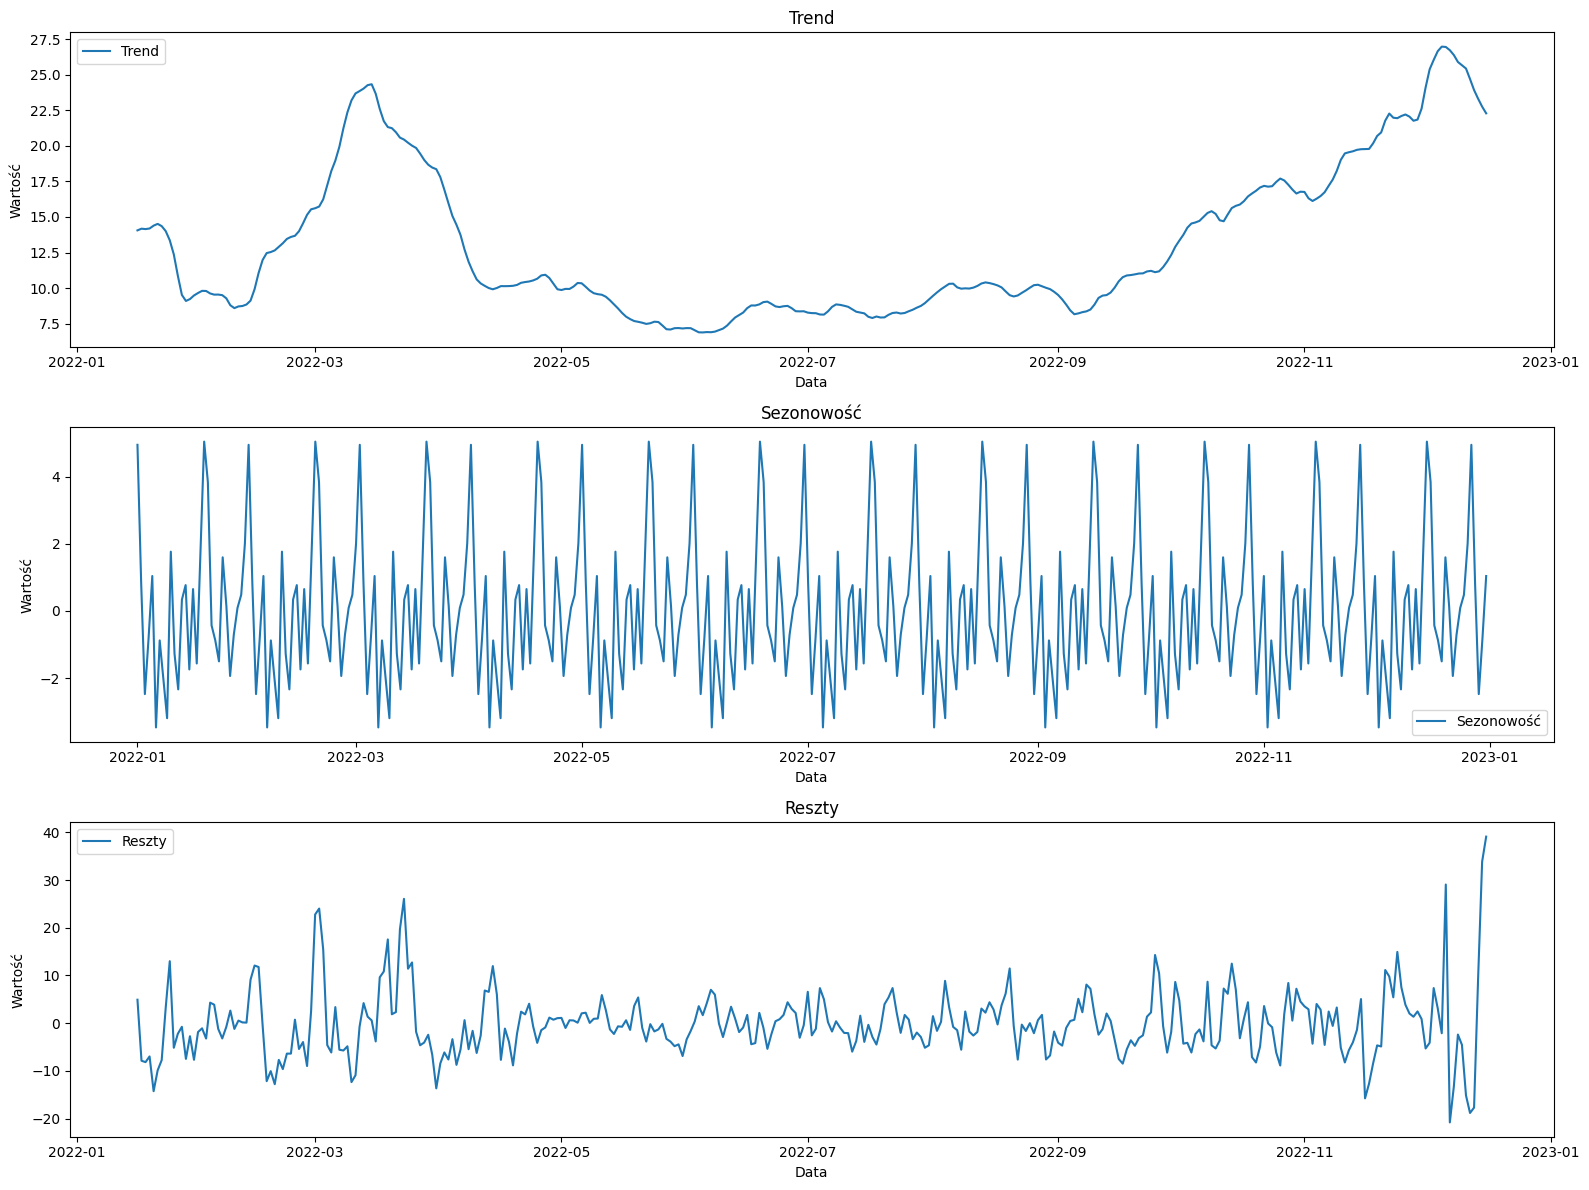

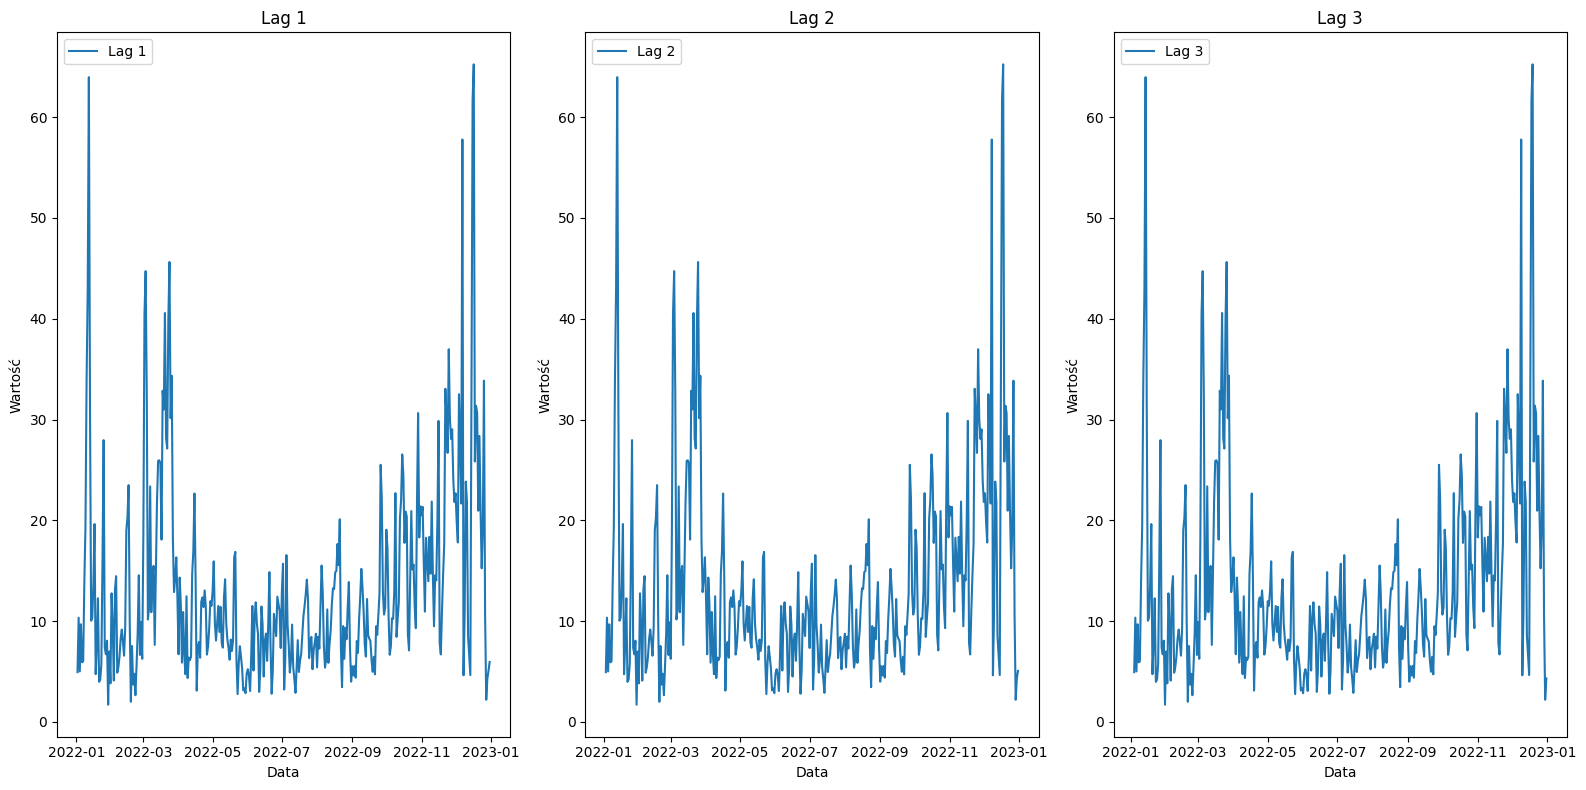

In [33]:
plt.figure(figsize=(16, 12))

# Trend
plt.subplot(3, 1, 1)
plt.plot(df.index, df['trend'], label='Trend')
plt.title('Trend')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()

# Sezonowość
plt.subplot(3, 1, 2)
plt.plot(df.index, df['seasonality'], label='Sezonowość')
plt.title('Sezonowość')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()

# Reszty
plt.subplot(3, 1, 3)
plt.plot(df.index, df['residual'], label='Reszty')
plt.title('Reszty')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()

plt.tight_layout()
plt.show()

# Lagi
plt.figure(figsize=(16, 8))
for i, lag in enumerate(significant_lags, 1):
    plt.subplot(1, len(significant_lags), i)
    plt.plot(df.index, df[f'lag_{lag}'], label=f'Lag {lag}')
    plt.title(f'Lag {lag}')
    plt.xlabel('Data')
    plt.ylabel('Wartość')
    plt.legend()

plt.tight_layout()
plt.show()

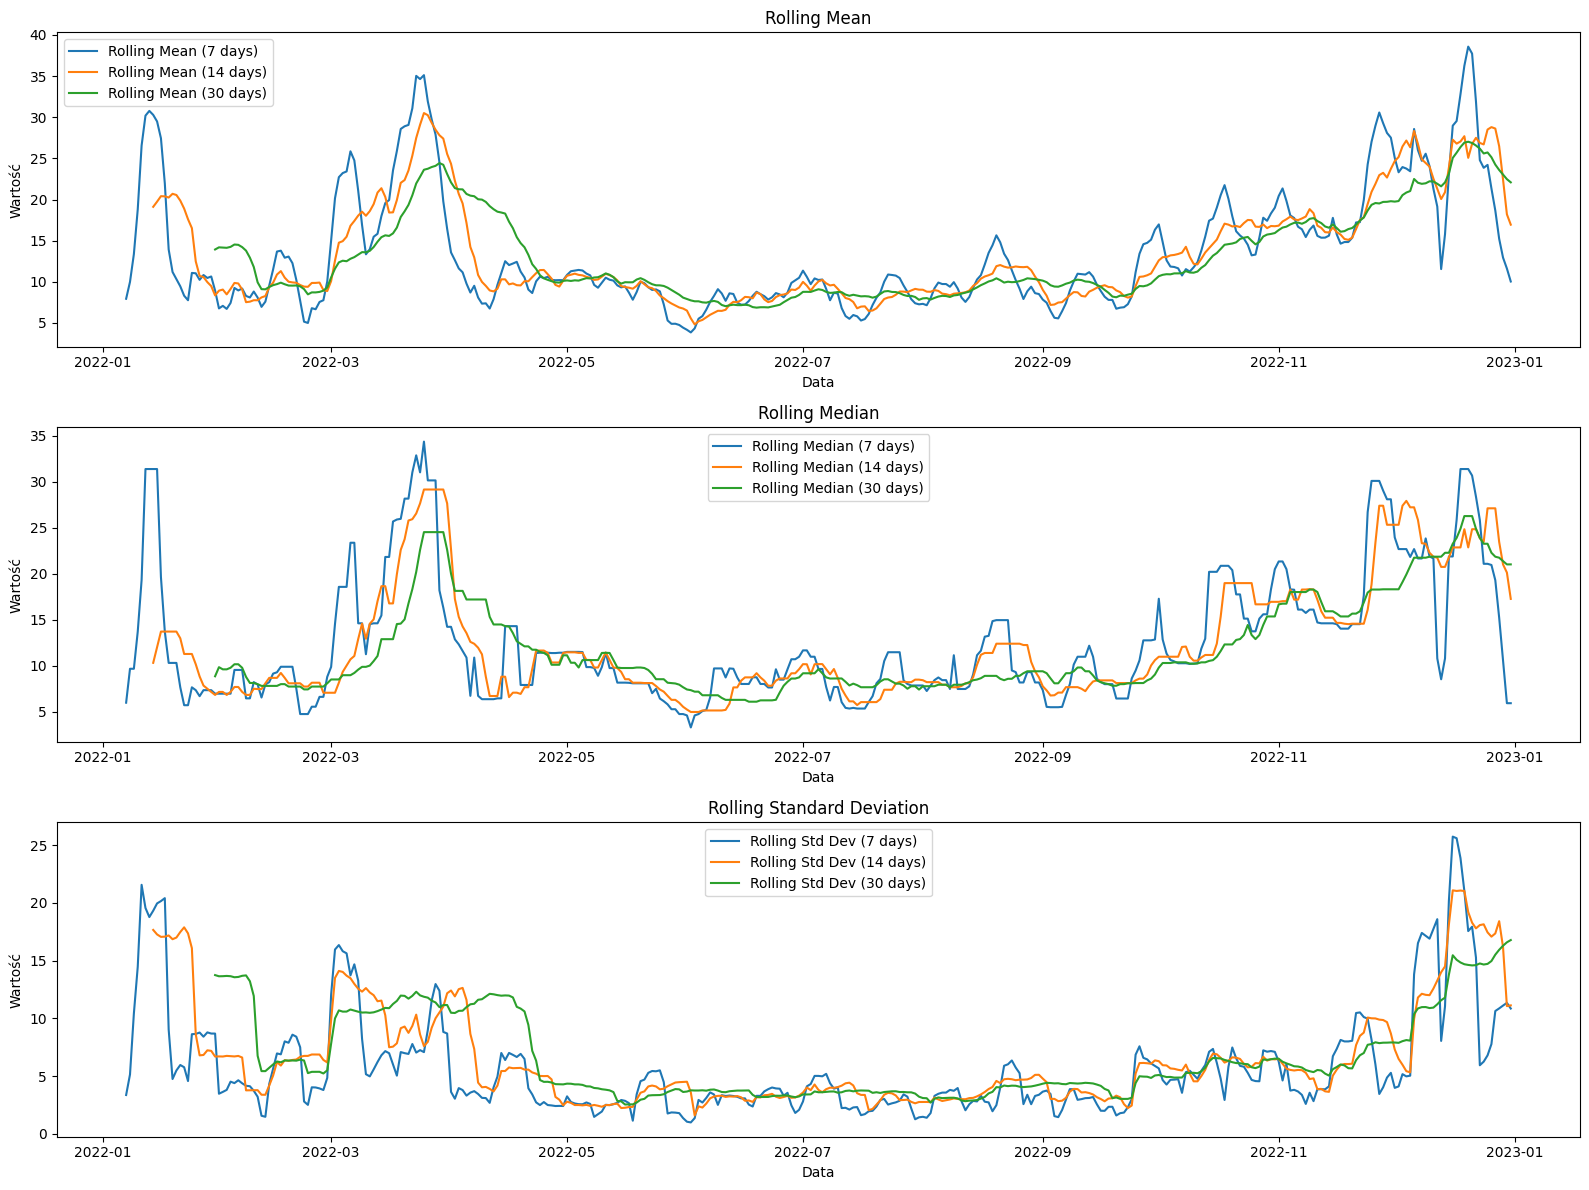

In [34]:
plt.figure(figsize=(16, 12))

# Rolling Mean
plt.subplot(3, 1, 1)
plt.plot(df.index, df['rolling_mean_7'], label='Rolling Mean (7 days)')
plt.plot(df.index, df['rolling_mean_14'], label='Rolling Mean (14 days)')
plt.plot(df.index, df['rolling_mean_30'], label='Rolling Mean (30 days)')
plt.title('Rolling Mean')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()

# Rolling Median
plt.subplot(3, 1, 2)
plt.plot(df.index, df['rolling_median_7'], label='Rolling Median (7 days)')
plt.plot(df.index, df['rolling_median_14'], label='Rolling Median (14 days)')
plt.plot(df.index, df['rolling_median_30'], label='Rolling Median (30 days)')
plt.title('Rolling Median')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()

# Rolling Std
plt.subplot(3, 1, 3)
plt.plot(df.index, df['rolling_std_7'], label='Rolling Std Dev (7 days)')
plt.plot(df.index, df['rolling_std_14'], label='Rolling Std Dev (14 days)')
plt.plot(df.index, df['rolling_std_30'], label='Rolling Std Dev (30 days)')
plt.title('Rolling Standard Deviation')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()

plt.tight_layout()
plt.show()

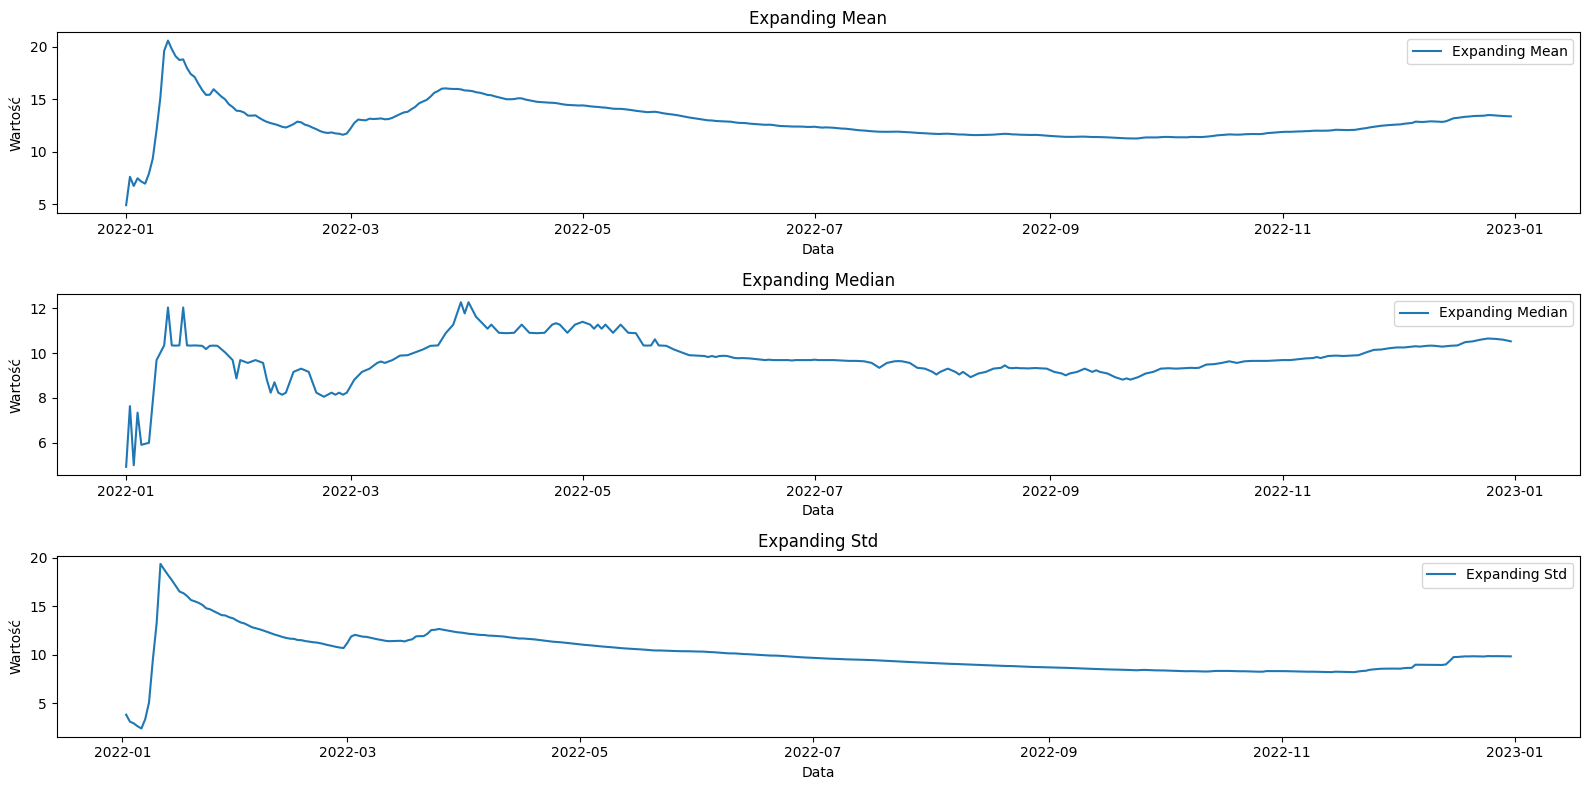

In [35]:
plt.figure(figsize=(16, 8))

# Expanding Mean
plt.subplot(3, 1, 1)
plt.plot(df.index, df['expanding_mean'], label='Expanding Mean')
plt.title('Expanding Mean')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()

# Expanding Median
plt.subplot(3, 1, 2)
plt.plot(df.index, df['expanding_median'], label='Expanding Median')
plt.title('Expanding Median')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()

# Expanding Std
plt.subplot(3, 1, 3)
plt.plot(df.index, df['expanding_std'], label='Expanding Std')
plt.title('Expanding Std')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()

plt.tight_layout()
plt.show()

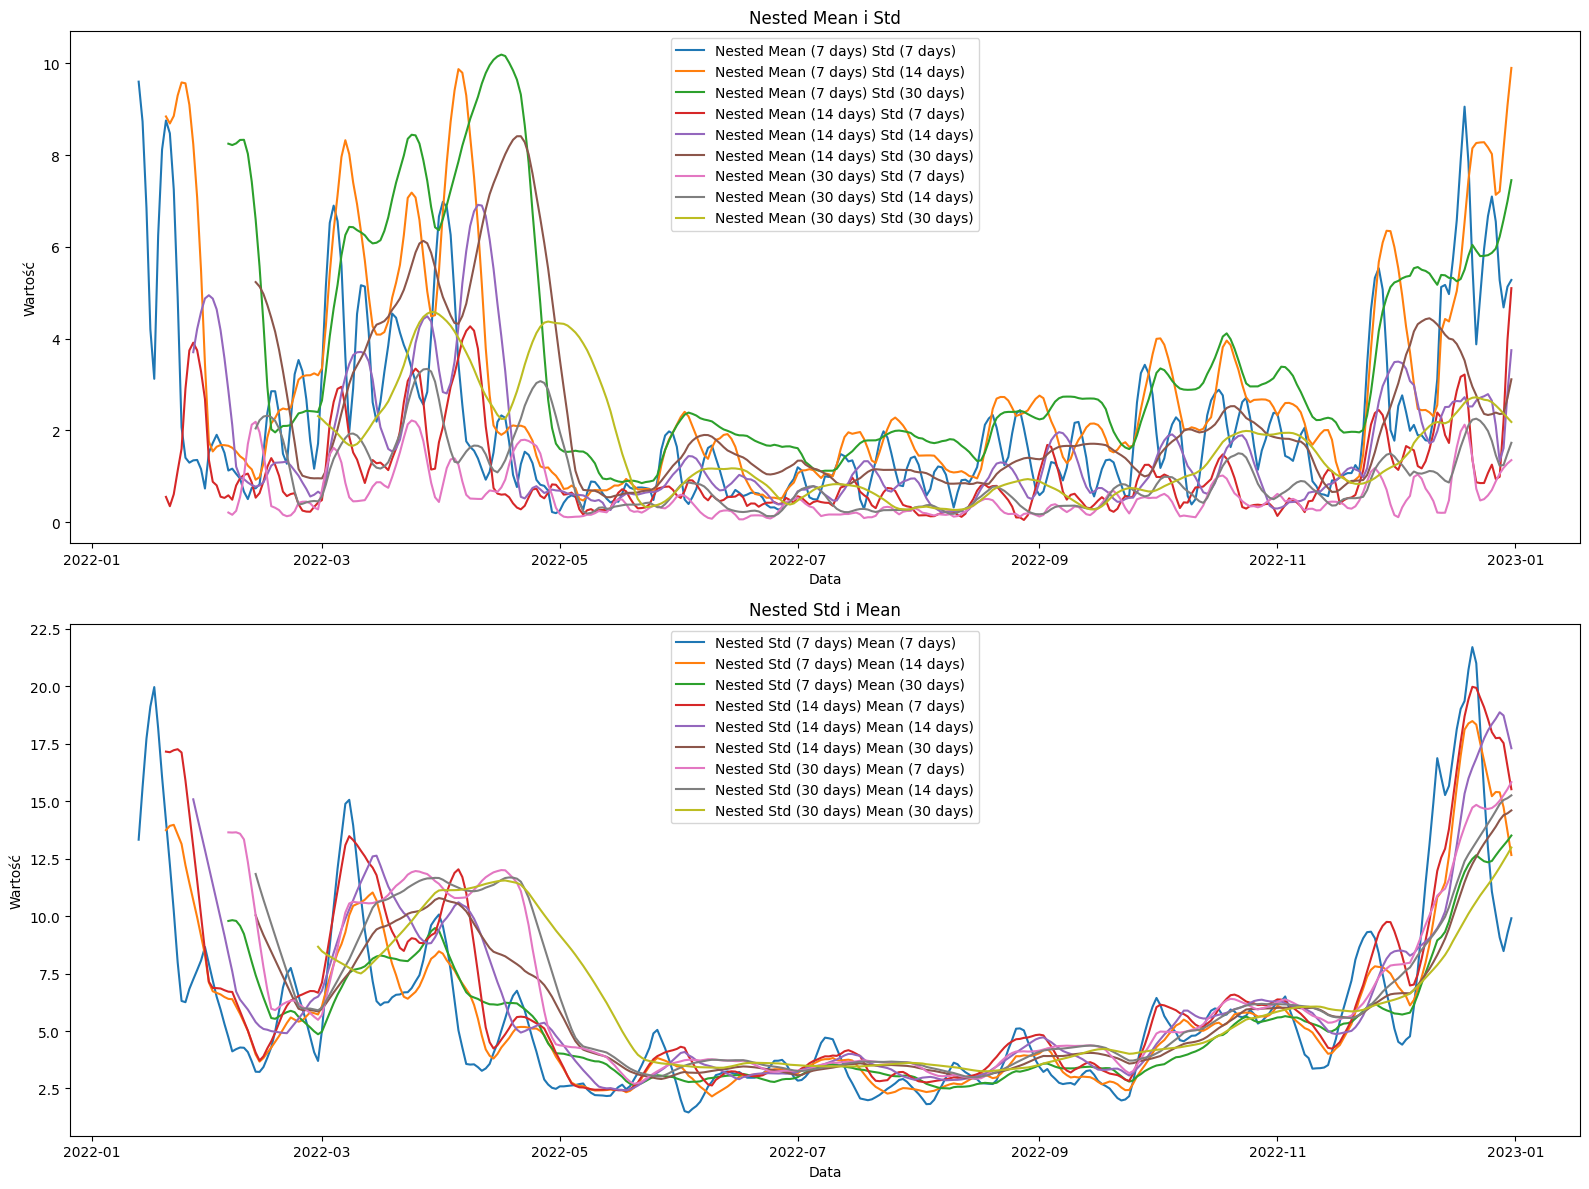

In [37]:
plt.figure(figsize=(16, 12))

# Nested Mean i Std
plt.subplot(2, 1, 1)
plt.plot(df.index, df['nested_mean_7_std_7'], label='Nested Mean (7 days) Std (7 days)')
plt.plot(df.index, df['nested_mean_7_std_14'], label='Nested Mean (7 days) Std (14 days)')
plt.plot(df.index, df['nested_mean_7_std_30'], label='Nested Mean (7 days) Std (30 days)')
plt.plot(df.index, df['nested_mean_14_std_7'], label='Nested Mean (14 days) Std (7 days)')
plt.plot(df.index, df['nested_mean_14_std_14'], label='Nested Mean (14 days) Std (14 days)')
plt.plot(df.index, df['nested_mean_14_std_30'], label='Nested Mean (14 days) Std (30 days)')
plt.plot(df.index, df['nested_mean_30_std_7'], label='Nested Mean (30 days) Std (7 days)')
plt.plot(df.index, df['nested_mean_30_std_14'], label='Nested Mean (30 days) Std (14 days)')
plt.plot(df.index, df['nested_mean_30_std_30'], label='Nested Mean (30 days) Std (30 days)')
plt.title('Nested Mean i Std')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()

# Nested Std i Mean
plt.subplot(2, 1, 2)
plt.plot(df.index, df['nested_std_7_mean_7'], label='Nested Std (7 days) Mean (7 days)')
plt.plot(df.index, df['nested_std_7_mean_14'], label='Nested Std (7 days) Mean (14 days)')
plt.plot(df.index, df['nested_std_7_mean_30'], label='Nested Std (7 days) Mean (30 days)')
plt.plot(df.index, df['nested_std_14_mean_7'], label='Nested Std (14 days) Mean (7 days)')
plt.plot(df.index, df['nested_std_14_mean_14'], label='Nested Std (14 days) Mean (14 days)')
plt.plot(df.index, df['nested_std_14_mean_30'], label='Nested Std (14 days) Mean (30 days)')
plt.plot(df.index, df['nested_std_30_mean_7'], label='Nested Std (30 days) Mean (7 days)')
plt.plot(df.index, df['nested_std_30_mean_14'], label='Nested Std (30 days) Mean (14 days)')
plt.plot(df.index, df['nested_std_30_mean_30'], label='Nested Std (30 days) Mean (30 days)')
plt.title('Nested Std i Mean')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()

plt.tight_layout()
plt.show()

In [39]:
df.to_csv("export.csv", index=False)